**`ML Flight Fare Prediction (Kaggle Problem Statement)`**

In this notebook, I have made an attempt to develop a model to solve the Kaggle Problem Statement - Flight Fare Prediction using ML Regression. Here, I have implemented various ML regression models and finally decided upon Random Forest Regressor for predictions.

--------------------------------------------------------------------------

Importing the libraries and the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_excel('Data_Train.xlsx')

In [4]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB



Checking if there are any missing values in Training and Test Dataset

In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data.shape

(10683, 11)

In [8]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
train_data.dropna(inplace = True)

In [10]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Pre-process & Perform Featurization of "Date_of_Journey"

In [11]:
data = train_data.copy()

In [12]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [13]:
def change_into_datetime(col):
    data[col]= pd.to_datetime(data[col])

In [14]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
for feature in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(feature)

In [16]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [17]:
data['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [18]:
data['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

lets do Feature Engineering of "Date_of_Journey" & fetch day,month,year !

In [19]:
data['Journey_day']= data['Date_of_Journey'].dt.day

In [20]:
data['Journey_month']= data['Date_of_Journey'].dt.month

In [21]:
data['Journey_year'] = data['Date_of_Journey'].dt.year

In [22]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-02-21 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-02-21 05:50:00,2023-02-21 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [23]:
data.drop('Date_of_Journey', axis = 1, inplace =True)

In [24]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-02-21 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-02-21 05:50:00,2023-02-21 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


Lets try to clean Dep_Time & Arrival_Time & featurize it.

Feature Engineering

In [25]:
def extract_hour_min(df,col):
    df[col+'_hour'] = df[col].dt.hour
    df[col+'minute'] = df[col].dt.minute
    df.drop(col, axis = 1, inplace = True)
    return df.head(2)

In [26]:
extract_hour_min(data, 'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Timeminute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-02-21 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [27]:
extract_hour_min(data, 'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Timeminute,Arrival_Time_hour,Arrival_Timeminute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


lets analyse when will most of the flights will take-off

In [28]:
def flight_dep_time(x):
    if (x > 4 ) and (x < 8 ):
        return 'Early Morning'
    elif (x > 8) and (x < 12):
        return 'Morning'
    elif (x > 12) and (x < 16):
        return 'Noon'
    elif (x > 16) and (x < 20):
        return 'Evening'
    elif (x > 20) and (x < 24):
        return 'Night'
    else:
        return 'late night'

In [29]:
data['Dep_Time_hour'].apply(flight_dep_time)

0                Night
1        Early Morning
2              Morning
3              Evening
4           late night
             ...      
10678          Evening
10679       late night
10680       late night
10681          Morning
10682          Morning
Name: Dep_Time_hour, Length: 10682, dtype: object

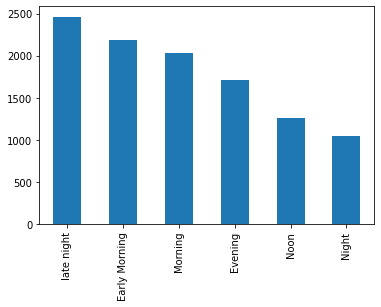

In [30]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind = 'bar')

lets use Cufflinks & plotly to make your visuals more interactive 

In [31]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [34]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind = 'bar')


KeyboardInterrupt: ignored

Pre-process Duration Feature & extract meaningful features

In [35]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h '+x
    elif 'm' not in x:
        x = x+' 0m'
    return x

In [36]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [37]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [38]:
data['Duration'][0].split(' ')[0]

'2h'

In [39]:
int(data['Duration'][0].split(' ')[0][0:-1])

2

In [40]:
int(data['Duration'][0].split(' ')[1][0:-1])

50

In [41]:
data['Duration'].apply(lambda x:int(data['Duration'][0].split(' ')[0][0:-1]))

0        2
1        2
2        2
3        2
4        2
        ..
10678    2
10679    2
10680    2
10681    2
10682    2
Name: Duration, Length: 10682, dtype: int64

In [42]:
data['Duration'].apply(lambda x:int(data['Duration'][0].split(' ')[1][0:-1]))

0        50
1        50
2        50
3        50
4        50
         ..
10678    50
10679    50
10680    50
10681    50
10682    50
Name: Duration, Length: 10682, dtype: int64

In [43]:
data['Duration_hours'] = data['Duration'].apply(lambda x:int(data['Duration'][0].split(' ')[0][0:-1]))

In [44]:
data['Duration_mins'] = data['Duration'].apply(lambda x:int(data['Duration'][0].split(' ')[1][0:-1]))

In [45]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Timeminute,Arrival_Time_hour,Arrival_Timeminute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,2,50


Lets Analyse whether Duration impacts on Price or not ?

In [46]:
data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m', '+1').apply(eval)

0         171
1         446
2        1141
3         326
4         286
         ... 
10678     151
10679     156
10680     181
10681     161
10682     501
Name: Duration, Length: 10682, dtype: int64

In [47]:
data['Duration_total_mins'] = data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m', '+1').apply(eval)

In [48]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Timeminute,Arrival_Time_hour,Arrival_Timeminute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,171
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,2,50,446


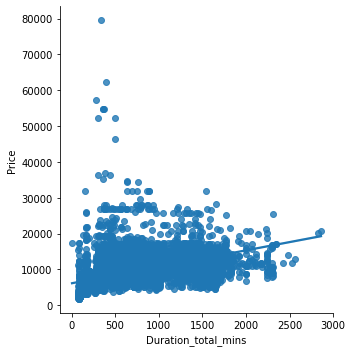

In [49]:
sns.lmplot(x= 'Duration_total_mins', y='Price',data=data)

In [50]:
data['Duration'].unique()

array(['2h 50m', '7h 25m', '19h 0m', '5h 25m', '4h 45m', '2h 25m',
       '15h 30m', '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m',
       '2h 15m', '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h 0m',
       '20h 35m', '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m',
       '5h 45m', '5h 55m', '13h 25m', '22h 0m', '5h 30m', '10h 25m',
       '5h 15m', '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m',
       '22h 5m', '2h 45m', '12h 0m', '16h 5m', '19h 55m', '3h 15m',
       '25h 20m', '3h 0m', '16h 15m', '15h 5m', '6h 30m', '25h 5m',
       '12h 25m', '27h 20m', '10h 15m', '10h 30m', '1h 30m', '1h 25m',
       '26h 30m', '7h 20m', '13h 30m', '5h 0m', '19h 5m', '14h 50m',
       '2h 40m', '22h 10m', '9h 35m', '10h 0m', '21h 20m', '18h 45m',
       '12h 20m', '18h 0m', '9h 15m', '17h 30m', '16h 35m', '12h 15m',
       '7h 30m', '24h 0m', '8h 55m', '7h 10m', '14h 30m', '30h 20m',
       '15h 0m', '12h 45m', '10h 10m', '15h 25m', '14h 5m', '20h 15m',
       '23h 10m', '18h 10m',

which city has maximum final destination of flights ?

In [51]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [52]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

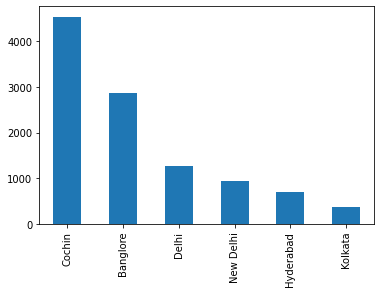

In [53]:
data['Destination'].value_counts().plot(kind = 'bar')

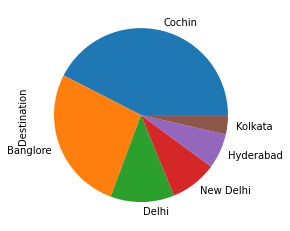

In [54]:
data['Destination'].value_counts().plot(kind = 'pie')

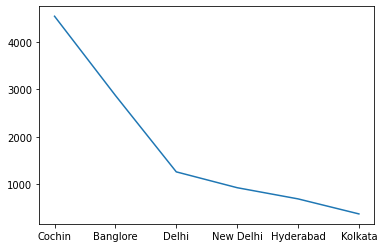

In [55]:
data['Destination'].value_counts().plot(kind = 'line')

Lets Perform Exploratory Data Analysis(Bivariate Analysis) to come up with some business insights

In [56]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [57]:
data['Airline']

0             IndiGo
1          Air India
2        Jet Airways
3             IndiGo
4             IndiGo
            ...     
10678       Air Asia
10679      Air India
10680    Jet Airways
10681        Vistara
10682      Air India
Name: Airline, Length: 10682, dtype: object

In [58]:
data[data['Airline'] == 'Jet Airways']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Timeminute,Arrival_Time_hour,Arrival_Timeminute,Duration_hours,Duration_mins,Duration_total_mins
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,2,50,1141
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,2019,18,55,10,25,2,50,931
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,2019,8,0,5,5,2,50,1266
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,2019,8,55,10,25,2,50,1531
13,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,12h 10m,1 stop,In-flight meal not included,9663,5,9,2019,21,10,9,20,2,50,731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10668,Jet Airways,Delhi,Cochin,DEL → JDH → BOM → COK,7h 20m,2 stops,No info,21219,5,9,2019,11,40,19,0,2,50,441
10672,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,19h 55m,2 stops,In-flight meal not included,11150,27,6,2019,23,5,19,0,2,50,1196
10673,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,15h 0m,2 stops,No info,16704,27,5,2019,13,25,4,25,2,50,901
10674,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,24h 45m,1 stop,In-flight meal not included,11087,3,12,2019,20,35,21,20,2,50,1486


In [59]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size()

Route
BLR → BDQ → DEL            8
BLR → BOM → DEL          385
BLR → BOM → JDH → DEL      3
BLR → DEL                382
BLR → MAA → DEL           10
BOM → BDQ → DEL → HYD      2
BOM → DED → DEL → HYD      1
BOM → DEL → HYD            5
BOM → HYD                207
BOM → IDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → VNS → DEL → HYD      1
CCU → BOM → BLR          930
CCU → BOM → PNQ → BLR      4
CCU → DEL → BLR          300
CCU → GAU → BLR           22
DEL → AMD → BOM → COK    141
DEL → ATQ → BOM → COK     38
DEL → BDQ → BOM → COK     28
DEL → BHO → BOM → COK     29
DEL → BOM → COK          875
DEL → CCU → BOM → COK      1
DEL → COK                 34
DEL → DED → BOM → COK      2
DEL → IDR → BOM → COK     86
DEL → IXC → BOM → COK     13
DEL → JAI → BOM → COK    207
DEL → JDH → BOM → COK     23
DEL → LKO → BOM → COK     25
DEL → MAA → BOM → COK     16
DEL → NAG → BOM → COK     61
DEL → UDR → BOM → COK      7
dtype: int64

In [60]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

Let's analyze  on which rout Jet Airways extremly used

Airline Vs Price Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

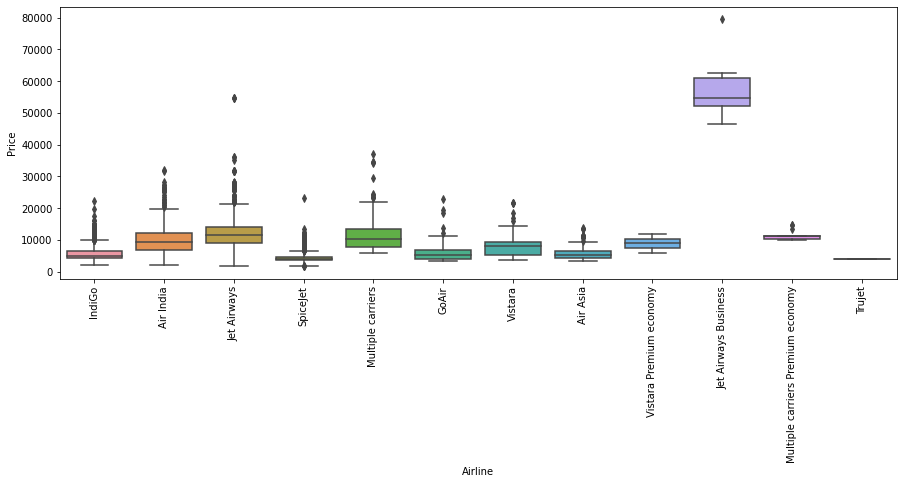

In [61]:
plt.figure(figsize = (15,5))
sns.boxplot(y = 'Price', x = 'Airline', data = data)
plt.xticks(rotation = 'vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

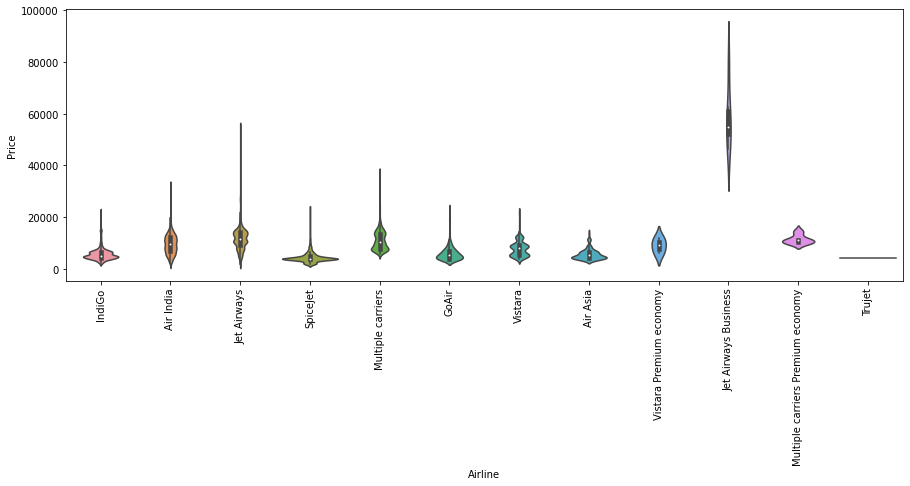

In [62]:
plt.figure(figsize = (15,5))
sns.violinplot(y = 'Price', x = 'Airline', data = data)
plt.xticks(rotation = 'vertical')

Lets Perform Feature-Encoding on Data !

Feature encoding (One hot encoding to data)

In [63]:
data.head(4)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Timeminute,Arrival_Time_hour,Arrival_Timeminute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,171
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,2,50,446
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,2,50,1141
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,2,50,326


In [64]:
np.round(data['Additional_Info'].value_counts()/len(data)*100, 2 )

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

In [65]:
data.drop(columns=['Additional_Info','Route','Duration_total_mins','Journey_year'], axis = 1, inplace =True)

In [66]:
data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Timeminute,Arrival_Time_hour,Arrival_Timeminute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,2,50
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,2,50


Lets separate categorical data & numerical data !

In [67]:
[col for col in data.columns if data[col].dtype=='object']

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

In [68]:
[col for col in data.columns if data[col].dtype!='object']

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Timeminute',
 'Arrival_Time_hour',
 'Arrival_Timeminute',
 'Duration_hours',
 'Duration_mins']

In [69]:
cat_col = [col for col in data.columns if data[col].dtype=='object']

In [70]:
num_col = [col for col in data.columns if data[col].dtype!='object']

Handling Categorical Data

In [71]:
data['Source']

0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10682, dtype: object

Lets apply one-hot encoding on 'Source' feature

In [72]:
data['Source'].unique

<bound method Series.unique of 0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10682, dtype: object>

In [73]:
data['Source'].apply(lambda x: 1 if x=='Bangalore' else 0)

0        0
1        0
2        0
3        0
4        0
        ..
10678    0
10679    0
10680    0
10681    0
10682    0
Name: Source, Length: 10682, dtype: int64

In [74]:
for category in data['Source'].unique():
    data['Source_'+category] = data['Source'].apply(lambda x : 1 if x==category else 0)

In [75]:
data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Timeminute,Arrival_Time_hour,Arrival_Timeminute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,2,50,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,2,50,0,0,1,0,0


Perform the Manual encoding 

In [76]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [77]:
data.groupby(['Airline'])['Price'].mean().sort_values().index

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')


Performing Target Guided Mean Encoding !

In [78]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [79]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [80]:
{key:index for index, key in enumerate(airlines, 0)}

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [81]:
dict1 = {key:index for index, key in enumerate(airlines, 0)}

In [82]:
data['Airline']=data['Airline'].map(dict1)

In [83]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [84]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [85]:
data['Destination'].replace('New Delhi', 'Delhi', inplace = True)

In [86]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [87]:
data.groupby(['Destination'])['Price'].mean().sort_values().index

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [88]:
data.groupby(['Destination'])['Price'].mean().sort_values().index

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [89]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [90]:

{key:index for index, key in enumerate(dest, 0)}

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [91]:
dict2 = {key:index for index, key in enumerate(dest, 0)}

In [92]:
data['Destination'] = data['Destination'].map(dict2)

In [93]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Timeminute,Arrival_Time_hour,Arrival_Timeminute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,5,1,5,50,13,15,2,50,0,1,0,0,0


In [94]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [95]:
stops = {'non-stop': 0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

Perform Manual Encoding on Total_stops feature¶

In [96]:
data['Total_Stops'] = data['Total_Stops'].map(stops)

In [97]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Timeminute,Arrival_Time_hour,Arrival_Timeminute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662,5,1,5,50,13,15,2,50,0,1,0,0,0


Performing Outlier Detection !

In [98]:
def plot(df, col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col], ax=ax2)
    sns.distplot(df[col], ax=ax3, kde=False)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



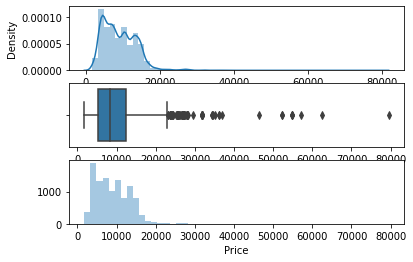

In [99]:
plot(data,'Price')

getting a high level over-view of various ways to deal with outliers

In [100]:
np.where(data['Price']>=35000, data['Price'].median(), data['Price'])

array([ 3897.,  7662., 13882., ...,  7229., 12648., 11753.])

In [101]:
data['Price'] = np.where(data['Price']>=35000, data['Price'].median(), data['Price'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



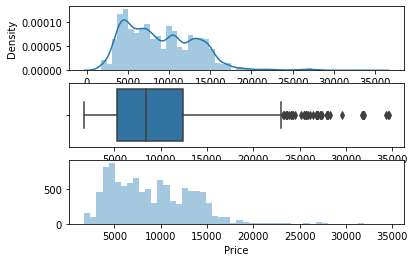

In [102]:
plot(data,'Price')

In [103]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Timeminute,Arrival_Time_hour,Arrival_Timeminute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662.0,5,1,5,50,13,15,2,50,0,1,0,0,0


In [104]:
 data.drop(columns=['Source','Duration'], axis=1, inplace=True)

In [105]:
data.head(2)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Timeminute,Arrival_Time_hour,Arrival_Timeminute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,5,1,5,50,13,15,2,50,0,1,0,0,0


In [106]:
data.dtypes

Airline                 int64
Destination             int64
Total_Stops             int64
Price                 float64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Timeminute          int64
Arrival_Time_hour       int64
Arrival_Timeminute      int64
Duration_hours          int64
Duration_mins           int64
Source_Banglore         int64
Source_Kolkata          int64
Source_Delhi            int64
Source_Chennai          int64
Source_Mumbai           int64
dtype: object

Performing Feature Selection

In [107]:
from sklearn.feature_selection import mutual_info_regression

In [108]:
data.drop(['Price'], axis=1)

,Airline,Destination,Total_Stops,Journey_day,Journey_month,Dep_Time_hour,Dep_Timeminute,Arrival_Time_hour,Arrival_Timeminute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,5,1,5,50,13,15,2,50,0,1,0,0,0
2,10,4,2,6,9,9,25,4,25,2,50,0,0,1,0,0
3,3,3,1,5,12,18,5,23,30,2,50,0,1,0,0,0
4,3,2,1,3,1,16,50,21,35,2,50,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,3,0,4,9,19,55,22,25,2,50,0,1,0,0,0
10679,7,3,0,27,4,20,45,23,20,2,50,0,1,0,0,0
10680,10,2,0,27,4,8,20,11,20,2,50,1,0,0,0,0
10681,5,2,0,3,1,11,30,14,10,2,50,1,0,0,0,0


In [109]:
X =data.drop(['Price'], axis=1)

In [110]:
y=data['Price']

In [111]:
X.dtypes

Airline               int64
Destination           int64
Total_Stops           int64
Journey_day           int64
Journey_month         int64
Dep_Time_hour         int64
Dep_Timeminute        int64
Arrival_Time_hour     int64
Arrival_Timeminute    int64
Duration_hours        int64
Duration_mins         int64
Source_Banglore       int64
Source_Kolkata        int64
Source_Delhi          int64
Source_Chennai        int64
Source_Mumbai         int64
dtype: object

In [112]:
y.dtypes

dtype('float64')

In [113]:
mutual_info_regression(X,y)

array([0.973087  , 0.99501673, 0.78950647, 0.19265978, 0.24009794,
       0.34367288, 0.25133961, 0.3910102 , 0.33864297, 0.00620034,
       0.        , 0.38290467, 0.4548815 , 0.51310628, 0.12774286,
       0.20390991])

In [114]:
pd.DataFrame(mutual_info_regression(X,y), index=X.columns)

,0
Airline,0.969863
Destination,1.001900
Total_Stops,0.779583
Journey_day,0.191057
Journey_month,0.239384
Dep_Time_hour,0.333151
Dep_Timeminute,0.255266
Arrival_Time_hour,0.404621
Arrival_Timeminute,0.350571
Duration_hours,0.000000


In [115]:
imp=pd.DataFrame(mutual_info_regression(X,y), index=X.columns)
imp.columns=['importance']

In [116]:
imp.sort_values(by='importance', ascending = False)

,importance
Destination,1.002286
Airline,0.979691
Total_Stops,0.783485
Source_Delhi,0.519055
Source_Kolkata,0.462741
Arrival_Time_hour,0.402588
Source_Banglore,0.386891
Arrival_Timeminute,0.357168
Dep_Time_hour,0.341485
Dep_Timeminute,0.258665


In [117]:
imp.sort_values(by='importance', ascending = False)

,importance
Destination,1.002286
Airline,0.979691
Total_Stops,0.783485
Source_Delhi,0.519055
Source_Kolkata,0.462741
Arrival_Time_hour,0.402588
Source_Banglore,0.386891
Arrival_Timeminute,0.357168
Dep_Time_hour,0.341485
Dep_Timeminute,0.258665


Lets build ML Model , then later on we can think of saving it

Build ML Model and Save the Model 

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [120]:
from sklearn.ensemble import RandomForestRegressor

In [121]:
ml_model= RandomForestRegressor()

In [122]:
model= ml_model.fit(X_train, y_train)

In [123]:
y_pred = model.predict(X_test)

In [124]:
y_pred.shape

(2671,)

In [125]:
len(X_test)

2671

How to save ML model into disk

In [129]:
import pickle

In [141]:
file= open(r'/content/sample_data/rf_random.pk1','wb')

In [144]:
file= open(r'/content/sample_data/rf_random.pk1','wb')

In [145]:
model = open(r'/content/sample_data/rf_random.pk1','rb')

In [153]:
#forest = pickle.load(model)

In [154]:
#forest.predict(X_test)

Defining your own evaluation metric

In [135]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))*100

In [152]:
#mape(y_test, forest.predict(X_test))

How to Automate ML Pipeline :

In [150]:
def predict(ml_model):
    
    model = ml_model.fit(X_train,y_train)
    print('training_score: {}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    print('Predictions are : {}'.format(y_prediction))
    print('\n')
    
    from sklearn import metrics
    r2_score = metrics.r2_score(y_test, y_prediction)
    print('r2_score:  {}'.format(r2_score))
    print('MSE  :', metrics.mean_squared_error(y_test, y_prediction))
    print('MAE  :', metrics.mean_absolute_error(y_test, y_prediction))
    print('MAPE  :', metrics.mean_squared_error(y_test, y_prediction))
    print('MAPE  :', mape(y_test, y_prediction))
    sns.distplot(y_test-y_prediction)
       

training_score: 0.9514985829344755
Predictions are : [16741.72  6054.87  8899.01 ...  3493.44  6285.58  6764.59]


r2_score:  0.8183685635109539
MSE  : 3535928.0922257504
MAE  : 1157.7354920143296
MAPE  : 3535928.0922257504
MAPE  : 13.054884310399196


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



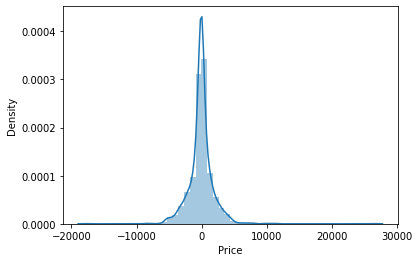

In [151]:
predict(RandomForestRegressor())

Performing Outlier Detection !